# ESCUELA POLITÉCNICA NACIONAL
## FACULTAD DE INGENIERÍA DE SISTEMAS
## ISAAC SALOMÓN PILATUÑA ZAMBRANO
## CAUSAS DE MUERTE USA 2015

In [5]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [6]:
path_general='data/'
filename_code_maps_2015='/code_maps_2015.json'
path_code_map=path_general+filename_code_maps_2015
path_guardado=path_general+'causas_de_muerte.pickle'
df_completo=pd.read_pickle(path_guardado)

In [7]:
try:
    with open(path_code_map,encoding="utf-8") as json_file:  
        code_maps_2015 = json.load(json_file)          
except:
    print("Error cargando code maps")

In [8]:
#Funcion para obtener las causas de muerte
df_completo['causa_muerte'] = df_completo['358_cause_recode'].apply(
    lambda x: code_maps_2015['%03d' % x])

In [9]:
#Referencia
#https://www.kaggle.com/sohier/mortality-data-format-v2-tutorial/

## Top causas de muerte

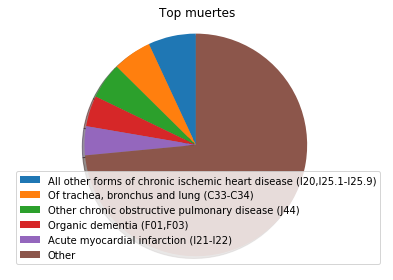

In [10]:
#Top causas de muerte
serie_count_muertes=df_completo.causa_muerte.value_counts().head(5)
serie_count_muertes['Other']=df_completo.shape[0]-serie_count_muertes.sum()
patches,texts=plt.pie(serie_count_muertes,startangle=90,shadow=True)
plt.legend(patches,serie_count_muertes.index,loc="best")
plt.axis('equal')
plt.title("Top muertes")
plt.tight_layout()
plt.show()

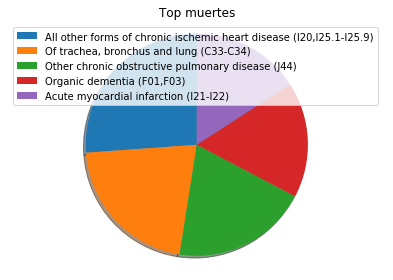

In [11]:
serie_count_muertes_sin_otros=df_completo.causa_muerte.value_counts().head(5)
atches,texts=plt.pie(serie_count_muertes_sin_otros,startangle=90,shadow=True)
plt.legend(patches,serie_count_muertes_sin_otros.index,loc="best")
plt.axis('equal')
plt.title("Top muertes")
plt.tight_layout()
plt.show()

## Porcentaje de muerte por violación según el sexo

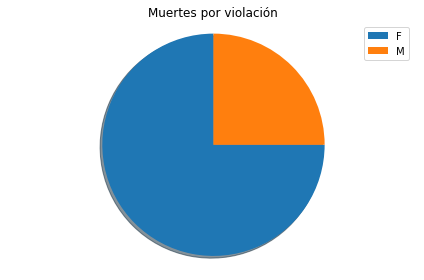

In [12]:
#Porcentaje casos de muerte por violación
violacion=df_completo['358_cause_recode']==439
df_casos_violacion=df_completo[violacion]
serie_count_violaciones=df_casos_violacion.sex.value_counts()
patches,texts=plt.pie(serie_count_violaciones,shadow=True,startangle=90)
plt.legend(patches,serie_count_violaciones.index,loc="best")
plt.axis("equal")
plt.title("Muertes por violación")
plt.tight_layout()
plt.show()

## Porcentaje de homicidios

Número de homicidios: 17701
Porcentaje de homicidios: 0.6512034811297779%


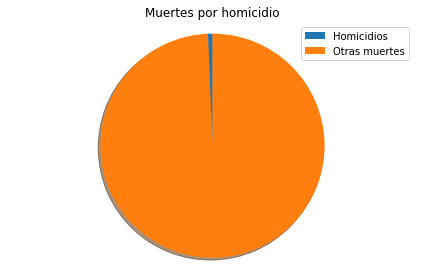

In [13]:
# Porcentaje de homicidios
indices=df_completo["causa_muerte"].str.find('homicide')
df_homicidios=df_completo[indices>0]
total_muertes=df_completo.shape[0]
numero_homicidios=df_homicidios.shape[0]
porcentaje_homicidios=(numero_homicidios/total_muertes)*100
serie_homicidios_todos=pd.Series([numero_homicidios,(total_muertes-numero_homicidios)],index=['Homicidios','Otras muertes'])
patches,texts=plt.pie(serie_homicidios_todos,shadow=True,startangle=90)
plt.legend(patches,serie_homicidios_todos.index,loc="best")
plt.axis("equal")
plt.title("Muertes por homicidio")
plt.tight_layout()
print(f"Número de homicidios: {numero_homicidios}")
print(f"Porcentaje de homicidios: {porcentaje_homicidios}%")
plt.show()

## Porcentaje de homicidios según el sexo

Número de homicidios a hombres: 14236
Porcentaje de homicidios a hombres: 80.42483475509859%
Número de homicidios a mujeres: 3465
Porcentaje homicidios a mujeres: 19.57516524490142%


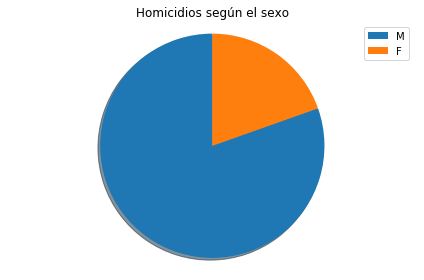

In [14]:
serie_homicidios_sexo=df_homicidios.sex.value_counts()
total_homicidios=df_homicidios.shape[0]
porcentaje_hombres=(serie_homicidios_sexo["M"]/total_homicidios)*100
porcentaje_mujeres=(serie_homicidios_sexo["F"]/total_homicidios)*100
patches,texts=plt.pie(serie_homicidios_sexo,shadow=True,startangle=90)
plt.legend(patches,serie_homicidios_sexo.index,loc="best")
plt.axis("equal")
plt.title("Homicidios según el sexo")
plt.tight_layout()
numero_homicidios_hombres=serie_homicidios_sexo['M']
numero_homicidios_mujeres=serie_homicidios_sexo['F']
print(f"Número de homicidios a hombres: {numero_homicidios_hombres}")
print(f"Porcentaje de homicidios a hombres: {porcentaje_hombres}%")
print(f"Número de homicidios a mujeres: {numero_homicidios_mujeres}")
print(f"Porcentaje homicidios a mujeres: {porcentaje_mujeres}%")
plt.show()

## Porcentaje de suicidios

Número de suicidios: 44324
Porcentaje de suicidios: 1.6306391219477019%


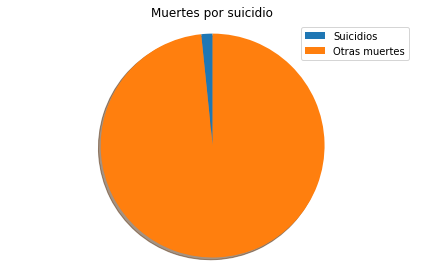

In [15]:
# Porcentaje de suicidios
indices=df_completo["causa_muerte"].str.find('suicide')
df_suicidio=df_completo[indices>0]
total_muertes=df_completo.shape[0]
numero_suicidios=df_suicidio.shape[0]
porcentaje_suicidios=(numero_suicidios/total_muertes)*100
porcentaje_otras_muertes=((total_muertes-numero_suicidios)/total_muertes)
serie_suicidios_todos=pd.Series([numero_suicidios,(total_muertes-numero_suicidios)],index=['Suicidios','Otras muertes'])
patches,texts=plt.pie(serie_suicidios_todos,shadow=True,startangle=90)
plt.legend(patches,serie_suicidios_todos.index,loc="best")
plt.axis("equal")
plt.title("Muertes por suicidio")
plt.tight_layout()
print(f"Número de suicidios: {numero_suicidios}")
print(f"Porcentaje de suicidios: {porcentaje_suicidios}%")
plt.show()

## Porcentaje de suicidios según el sexo

Número de suicidios de hombres: 34103
Porcentaje de suicidios de hombres: 76.94025809944951%
Número de suicidios de mujeres: 10221
Porcentaje de suicidios de mujeres: 23.059741900550492%


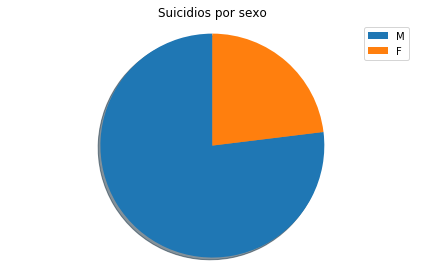

In [16]:
# Porcentaje suicidios vs sexo

serie_suicidios_sexo=df_suicidio.sex.value_counts()
total_suicidios=df_suicidio.shape[0]
porcentaje_hombres=(serie_suicidios_sexo["M"]/total_suicidios)*100
porcentaje_mujeres=(serie_suicidios_sexo["F"]/total_suicidios)*100
patches,texts=plt.pie(serie_suicidios_sexo,shadow=True,startangle=90)
plt.legend(patches,serie_suicidios_sexo.index,loc="best")
plt.axis("equal")
plt.title("Suicidios por sexo")
plt.tight_layout()
numero_suicidios_hombres=serie_suicidios_sexo['M']
numero_suicidios_mujeres=serie_suicidios_sexo['F']
print(f"Número de suicidios de hombres: {numero_suicidios_hombres}")
print(f"Porcentaje de suicidios de hombres: {porcentaje_hombres}%")
print(f"Número de suicidios de mujeres: {numero_suicidios_mujeres}")
print(f"Porcentaje de suicidios de mujeres: {porcentaje_mujeres}%")
plt.show()

## Porcentaje de hombres que cometieron suicidio según estado marital

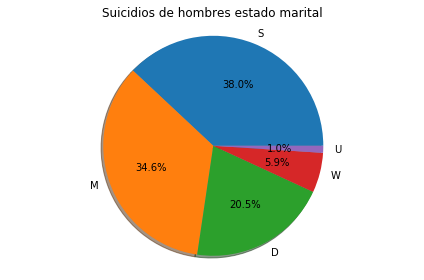

In [17]:
# Porcentaje suicidios vs HOMBRES vs estado marital
df_suicidios_sex= df_suicidio[['sex','marital_status']].copy()
df_suicidios_hombres=df_suicidios_sex[df_suicidios_sex.sex=='M']['marital_status']
series_suicidios_hombres=df_suicidios_hombres.value_counts()
plt.pie(series_suicidios_hombres,shadow=True,labels=series_suicidios_hombres.index,autopct='%1.1f%%')
#plt.legend(patches,series_suicidios_hombres.index,loc="best")
plt.axis("equal")
plt.title("Suicidios de hombres estado marital")
plt.tight_layout()
plt.show()

## Porcentaje de mujeres que cometieron suicidio según estado marital

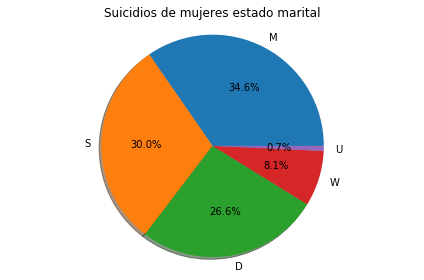

In [18]:
# Porcentaje suicidios vs MUJERES vs estado marital
df_suicidios_sex= df_suicidio[['sex','marital_status']].copy()
df_suicidios_mujeres=df_suicidios_sex[df_suicidios_sex.sex=='F']['marital_status']
series_suicidios_mujeres=df_suicidios_mujeres.value_counts()
plt.pie(series_suicidios_mujeres,shadow=True,labels=series_suicidios_mujeres.index,autopct='%1.1f%%')
#plt.legend(patches,series_suicidios_hombres.index,loc="best")
plt.axis("equal")
plt.title("Suicidios de mujeres estado marital")
plt.tight_layout()
plt.show()

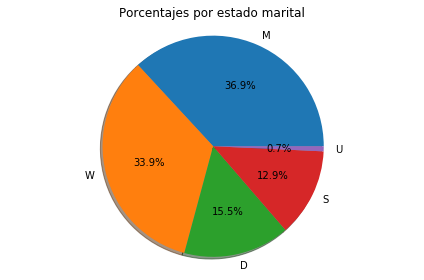

In [19]:

serie_estado_marital=df_completo.marital_status.value_counts()
serie_estado_marital
plt.pie(serie_estado_marital,shadow=True,labels=serie_estado_marital.index,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Porcentajes por estado marital")
plt.tight_layout()
plt.show()